# U.S. Adult Census: Income Prediction with Logistic Regression

<b>Prepared for DSCI 310 by Group 8:</b>
- Benjamin Gerochi
- Izzy Zhou
- Michael Tham
- Yui Mikuriya

## (1) Summary


This report investigates income prediction using the UCI Adult Dataset, which compiles demographic and income data from the 1994 U.S. Census. The primary objective is to predict whether an individual earns over $50,000 annually using factors such as age, education level, and hours worked per week. By employing a logistic regression model, the analysis effectively predicted income levels on test cases while assessing model performance using metrics like the ROC curve (AUC ≈ 0.79), sensitivity, specificity, and accuracy. The findings underscore that while the model achieves robust overall accuracy, there are challenges with false positives that warrant further refinement.

The insights derived from this study not only validate the role of education and work intensity in income determination but also suggest avenues for future research, such as integrating geographic and intersectional demographic variables to capture the complexities of income disparities. Overall, the analysis offers a comprehensive approach to understanding income inequality and provides actionable information for policy makers and individuals aiming to navigate economic opportunities.

## (2) Introduction
## Dataset Overview

The dataset selected for this project is the **Adult Dataset** (Kohavi & Becker, 1996), available through the **UCI Machine Learning Repository**. It contains demographic and income data collected by the **U.S. Census Bureau** and is widely used for predicting whether an individual’s income exceeds **$50,000 per year** based on various demographic factors.

### Dataset Details:
- **Dataset Name**: UC Irvine Adult Dataset  
- **Source**: 1994 U.S. Census database, compiled by Ronny Kohavi and Barry Becker  
  - [Access the dataset here](https://archive.ics.uci.edu/ml/datasets/adult)  
- **Total Observations**: 32,561  
- **Total Variables**: 15  


### Variables and Their Types


| Variable Index | Variable Name       | Type      | Description |
|----------------|---------------------|-----------|-------------|
| 0              | age                 | continuous       | Age of the individual |
| 1              | workclass           | categorical    | Employment sector (e.g., Private, Self-emp-not-inc, State-gov) |
| 2              | fnlwgt              | continuous       | Final weight, representing the number of people the observation represents in the population |
| 3              | education           | categorical    | Highest level of education attained |
| 4              | education-num       | continuous       | Numerical representation of education level |
| 5              | marital-status      | categorical    | Marital status (e.g., Never-married, Married-civ-spouse) |
| 6              | occupation          | categorical    | Type of occupation (e.g., Adm-clerical, Exec-managerial) |
| 7              | relationship        | categorical    | Relationship of the individual to the household (e.g., Husband, Not-in-family) |
| 8              | race                | categorical    | Race of the individual (e.g., White, Black) |
| 9              | sex                 | categorical    | Gender (Male/Female) |
| 10             | capital-gain        | continuous       | Capital gains earned |
| 11             | capital-loss        | continuous       | Capital losses incurred |
| 12             | hours-per-week      | continuous       | Average hours worked per week |
| 13             | native-country      | categorical    | Country of origin |
| 14             | income              | categorical    | Income level (<=50K, >50K) |

#### Table 2.1: Description of U.S. Census Adult Dataset Variables

<!-- ### Descriptive Statistics

- **Age**: Ranges from 17 to 90, with an average age of 38.6 years.
- **Education-num**: Has values from 1 to 16, representing various education levels.
- **Capital-gain**: Ranges from 0 to 99,999, with most values concentrated around zero, indicating that high capital gains are rare.
- **Capital-loss**: Similar to capital gain, most values are zero.
- **Hours-per-week**: Has a mean of 40.4 hours, aligning with typical full-time work expectations.
- **Income**: Target variable, classified into two categories: <=50K and >50K. -->

This dataset includes both **categorical** and **numerical** variables, making it suitable for analyzing relationships between **demographic attributes** and **income levels**. Further **exploration and preprocessing** may involve handling **missing values** and **encoding categorical features**.  

### Research Question  
**How accurately can key demographic factors predict whether an individual's annual income exceeds $50,000?**  

This study aims to use demographic variables to predict income levels without pre-assuming key predictors. Our team initially analyzed different aspects of the dataset before deciding to focus on demographic influences on income such as age, education, and hours worked.  

### Literature Context  
Prior research supports the importance of demographic factors in income prediction. Jo (2023) analyzed the **Adult dataset** and identified **capital gain, education, relationship status, and occupation** as key predictors. Similarly, Azzollini et al. (2023) found that demographic differences explained **40% of income inequality** across OECD countries, reinforcing the relevance of our analysis.  

### **Objective**

To develop and evaluate a predictive model that estimates the probability of an individual earning more than $50,000 annually based on their demographic characteristics:

- **Prediction:** Build a robust model to forecast whether an individual's annual income will exceed $50,000.
- **Model Evaluation:** Assess model performance to ensure that the model provides reliable predictions.

## (3) Methods & Results

### Loading the Required Libraries and Dataset
We will start by importing the necessary R libraries for data analysis and preprocessing.

In [15]:
install.packages(c("broom", "repr", "infer", "gridExtra", "faraway",  
                   "mltools", "leaps", "glmnet", "cowplot", "modelr",  
                   "tidyverse", "ggplot2", "dplyr", "GGally", "patchwork", "knitr", "pROC"))

library(broom)
library(repr)
library(infer)
library(gridExtra)
library(faraway)
library(mltools)
library(leaps)
library(glmnet)
library(cowplot)
library(modelr)
library(tidyverse)
library(ggplot2)
library(dplyr)
library(GGally)
library(patchwork)
library(knitr)
library(pROC)


The downloaded binary packages are in
	/var/folders/cy/0h9sxbhx0l74hn41rbhx2kzc0000gn/T//RtmpD2Gu8x/downloaded_packages


We then load the dataset into R by referencing the downloaded file path.

In [2]:
file_path <- "data/census+income/adult.data"

income <- read_csv(file_path, 
                   col_names = FALSE,
                   na = "?")

colnames(income) <- c(
    "age", "workclass", "fnlwgt", "education", "education_num",
    "marital_status", "occupation", "relationship", "race",
    "sex", "capital_gain", "capital_loss", "hours_per_week",
    "native_country", "income")

head(income)

Rows: 32561 Columns: 15
── Column specification ─────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (9): X2, X4, X6, X7, X8, X9, X10, X14, X15
dbl (6): X1, X3, X5, X11, X12, X13

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


#### Table 3.1: Loaded Adult Census Income Dataset

### Data Wrangling

We will begin by removing missing values from the dataset. Additionally, we will convert the income column into a factor variable to ensure R treats it as a categorical variable. This transformation is crucial for statistical modeling and visualization, especially when income is used as a binary outcome in logistic regression.

In [3]:
income <- income %>%
  mutate(income = as.factor(income))

income_clean <- income %>%
  drop_na()

summary(income_clean)

      age         workclass             fnlwgt         education        
 Min.   :17.00   Length:30162       Min.   :  13769   Length:30162      
 1st Qu.:28.00   Class :character   1st Qu.: 117627   Class :character  
 Median :37.00   Mode  :character   Median : 178425   Mode  :character  
 Mean   :38.44                      Mean   : 189794                     
 3rd Qu.:47.00                      3rd Qu.: 237628                     
 Max.   :90.00                      Max.   :1484705                     
 education_num   marital_status      occupation        relationship      
 Min.   : 1.00   Length:30162       Length:30162       Length:30162      
 1st Qu.: 9.00   Class :character   Class :character   Class :character  
 Median :10.00   Mode  :character   Mode  :character   Mode  :character  
 Mean   :10.12                                                           
 3rd Qu.:13.00                                                           
 Max.   :16.00                               

#### Table 3.2: Summary of Cleaned Adult Income Dataset

After removing missing values, we randomly sample 10% of the data (which contains a total of 32,561 observations) for efficiency. The sample is then split into training and testing sets (80-20 split) for prediction analysis.

In [4]:
set.seed(1234)

sample_size <- 0.1*nrow(income_clean)

income_sample <- income_clean %>% 
  sample_n(size = sample_size)

train_indices <- sample(seq_len(nrow(income_sample)), size = 0.8 * nrow(income_sample))
train_data <- income_sample[train_indices, ]
test_data <- income_sample[-train_indices, ]

head(train_data)

age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<fct>
46,Private,155654,HS-grad,9,Married-civ-spouse,Other-service,Wife,White,Female,0,0,40,United-States,<=50K
22,Private,145964,Bachelors,13,Never-married,Sales,Own-child,White,Male,0,0,40,United-States,<=50K
59,Private,31137,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,>50K
46,Private,360096,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,15024,0,60,United-States,>50K
50,Private,104501,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,>50K
24,Private,301199,Some-college,10,Never-married,Tech-support,Own-child,White,Female,0,0,20,United-States,<=50K


#### Table 3.3: Training Set of Adult Income Sample Data

### Exploratory Data Analysis and Visualization

#### Dropping Variables:

To focus on the most relevant variables, we will exclude columns that do not directly contribute to addressing our research question. Hence, we have retained demographic predictors such as age, education level, and hours worked per week. These predictors were chosen based on both theoretical considerations and empirical evidence from exploratory analyses, which indicate that they have a significant influence on income levels.

In [5]:
train_data <- train_data %>%
  select(-fnlwgt, -education, -relationship, -workclass, -capital_gain, -capital_loss, -marital_status, -occupation, -race, -sex, -native_country) 

head(train_data)

age,education_num,hours_per_week,income
<dbl>,<dbl>,<dbl>,<fct>
46,9,40,<=50K
22,13,40,<=50K
59,9,40,>50K
46,13,60,>50K
50,9,40,>50K
24,10,20,<=50K


#### Table 3.4: Training Set with Relevant Variables Retained

Next, we create pairwise plots to examine relationships between continuous variables (`age`, `hours_per_week`, `education_num`) and the response variable, as well as associations among the input variables.

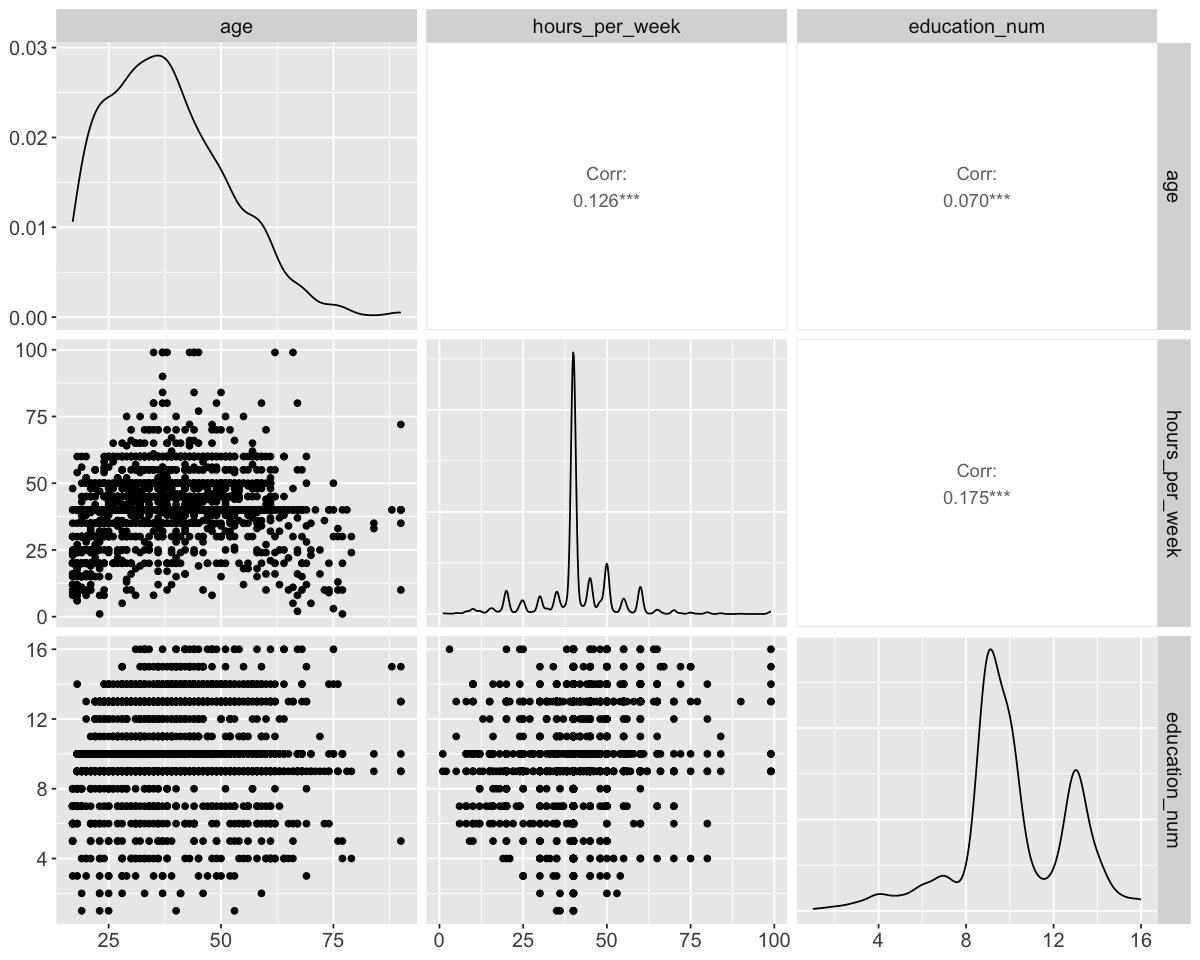

In [6]:
options(repr.plot.width = 10, repr.plot.height = 8)
continuous_data <- train_data %>%
  select(age, hours_per_week, education_num)

ggpairs(continuous_data) +
  theme(
    text = element_text(size = 15),
    plot.title = element_text(face = "bold"),
    axis.title = element_text(face = "bold")
  )

#### Figure 3.1: Pairwise Plot among Continuous Relationships

The pairwise plots show that `age` is right-skewed, `hours_per_week` peaks around 40, and `education_num` has a bimodal distribution. Weak correlations (< 0.6) suggest minimal multicollinearity.

The following code generates summary tables for continuous variables, with the code computing key summary statistics: mean, standard deviation, median, variance, maximum, and minimum. 

In [7]:
continuous_summary <- train_data %>%
  select(age, hours_per_week, education_num) %>%  
  pivot_longer(cols = everything()) %>%  
  group_by(name) %>% 
  summarise(
    mean = mean(value, na.rm = TRUE),
    sd = sd(value, na.rm = TRUE),
    median = median(value, na.rm = TRUE),
    variance = var(value, na.rm = TRUE),
    max = max(value, na.rm = TRUE),
    min = min(value, na.rm = TRUE),
    .groups = "drop"
  )

continuous_summary

name,mean,sd,median,variance,max,min
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
age,38.19071,13.399089,37,179.535575,90,17
education_num,10.10945,2.581007,10,6.661595,16,1
hours_per_week,40.81633,11.896025,40,141.515403,99,1


#### Table 3.5: Summary Statistics of Relevant Predictors

The summary statistics show that the average `age` is 38 years (SD = 13.39) with a range of 17 to 90. The average education level (`education_num`) is 10 years (SD = 2.55), reflecting high school or some college education. For `hours_per_week`, the average is 40.85 hours (SD = 11.96), with a maximum of 99 hours, indicating some individuals work significantly long hours.

### Proposed Method: Logistic Regression for Prediction and ROC Curve for Model Evaluation

Why is Logistic Regression Appropriate?

Logistic regression is suitable for modeling binary outcomes like income categories (<=50K and >50K). It estimates the probability of an individual falling into a specific category based on predictors, then classifies the predictions based on a threshold. 

#### Assumptions:
1. Independence of observations.
2. No high correlation among predictors.
3. A large enough sample size for reliable estimates.

#### Limitations:
1. Potential underfitting if too little predictors are included.

### Fit the Logistic Regression Model
In the following code, we fit the logistic regression model to the training sample using the relevant predictors. 

In [8]:
selected_vars <- c(
  "age", 
  "education_num", 
  "hours_per_week"
)

formula_reduced <- as.formula(paste("income ~", paste(selected_vars, collapse = " + ")))

full_model <- glm(formula_reduced, data = train_data, family = binomial)

summary(full_model)


Call:
glm(formula = formula_reduced, family = binomial, data = train_data)

Coefficients:
                Estimate Std. Error z value Pr(>|z|)    
(Intercept)    -8.393132   0.400533 -20.955   <2e-16 ***
age             0.045404   0.004242  10.704   <2e-16 ***
education_num   0.341450   0.023747  14.379   <2e-16 ***
hours_per_week  0.042833   0.004891   8.758   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2695  on 2411  degrees of freedom
Residual deviance: 2180  on 2408  degrees of freedom
AIC: 2188

Number of Fisher Scoring iterations: 5


#### Table 3.6: Summary of the Logistic Regression Model 

### Visualizing the ROC Curve
To evaluate the model, we will use the ROC curve to visualize the trade-off between sensitivity and specificity across classification thresholds. The AUC (Area Under the Curve) will be calculated to quantify model performance, with values closer to 1 indicating strong discrimination and values near 0.5 suggesting random guessing.

Setting levels: control = <=50K, case = >50K

Setting direction: controls < cases



Area under the curve: 0.7965


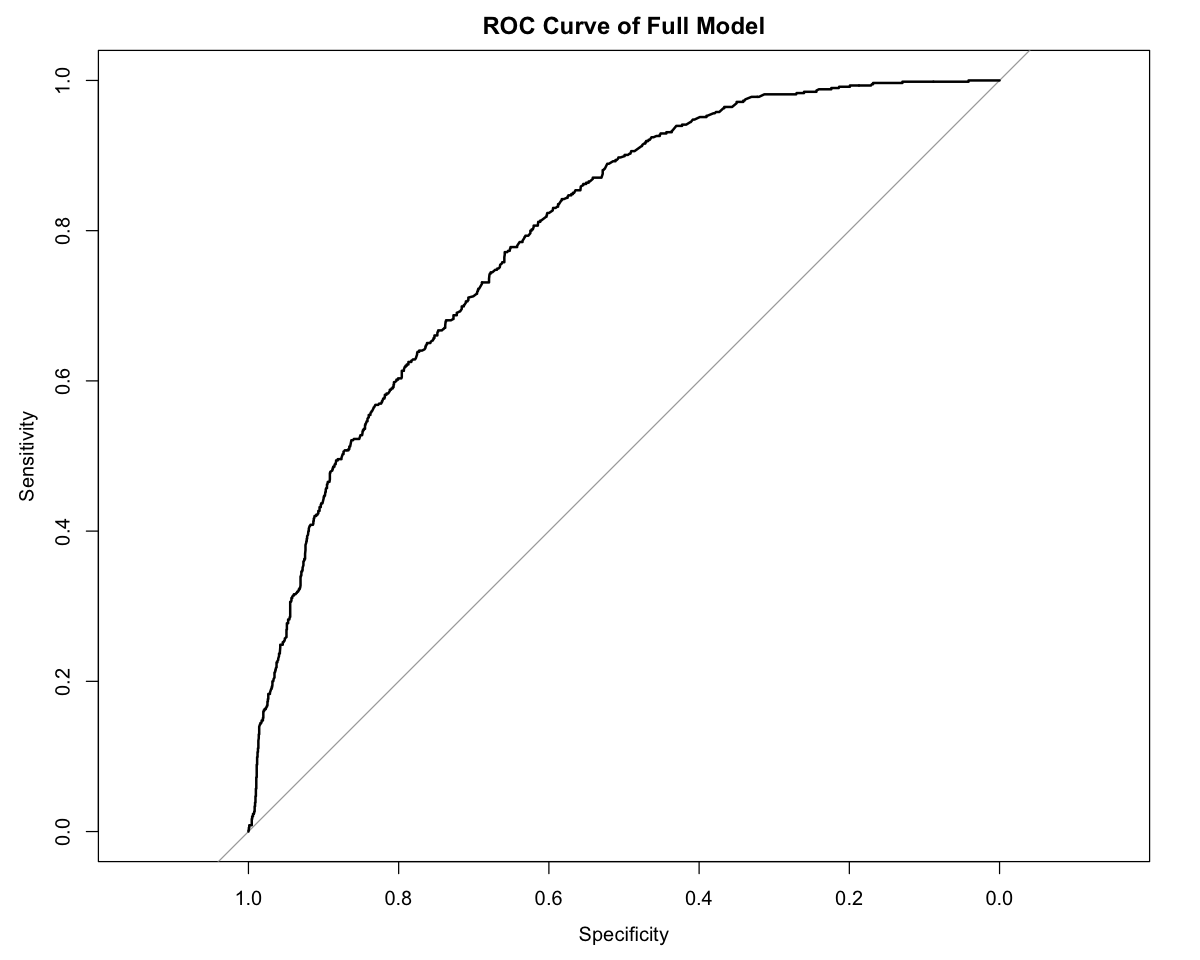

In [16]:
actual_classes <- train_data$income
predicted_probs <- predict(full_model, type = "response")

roc_curve <- roc(actual_classes, predicted_probs)
plot(roc_curve, main = "ROC Curve of Full Model")

auc_value <- auc(roc_curve)
print(auc_value)

#### Figure 3.2: ROC Curve of the Logistic Regression Model

The AUC (Area Under the Curve) values obtained for the model (0.7965) is significantly above 0.5, indicating that the model perform much better than random guessing. The high AUC value suggests that the model has strong discriminatory power, effectively distinguishing between individuals earning `<=50K` and `>50K` based on the selected predictors. 

### Test the Model on the Testing Dataset
Now, we perform the classification analysis and apply the model to the testing dataset (test_data). 

In [10]:
test_pred_probs <- predict(full_model, newdata = test_data[, c("age", "hours_per_week", "education_num")], type = "response")
test_pred_class <- ifelse(test_pred_probs > 0.5, ">50K", "<=50K")

We then visualize the results of the analysis in a confusion matrix.

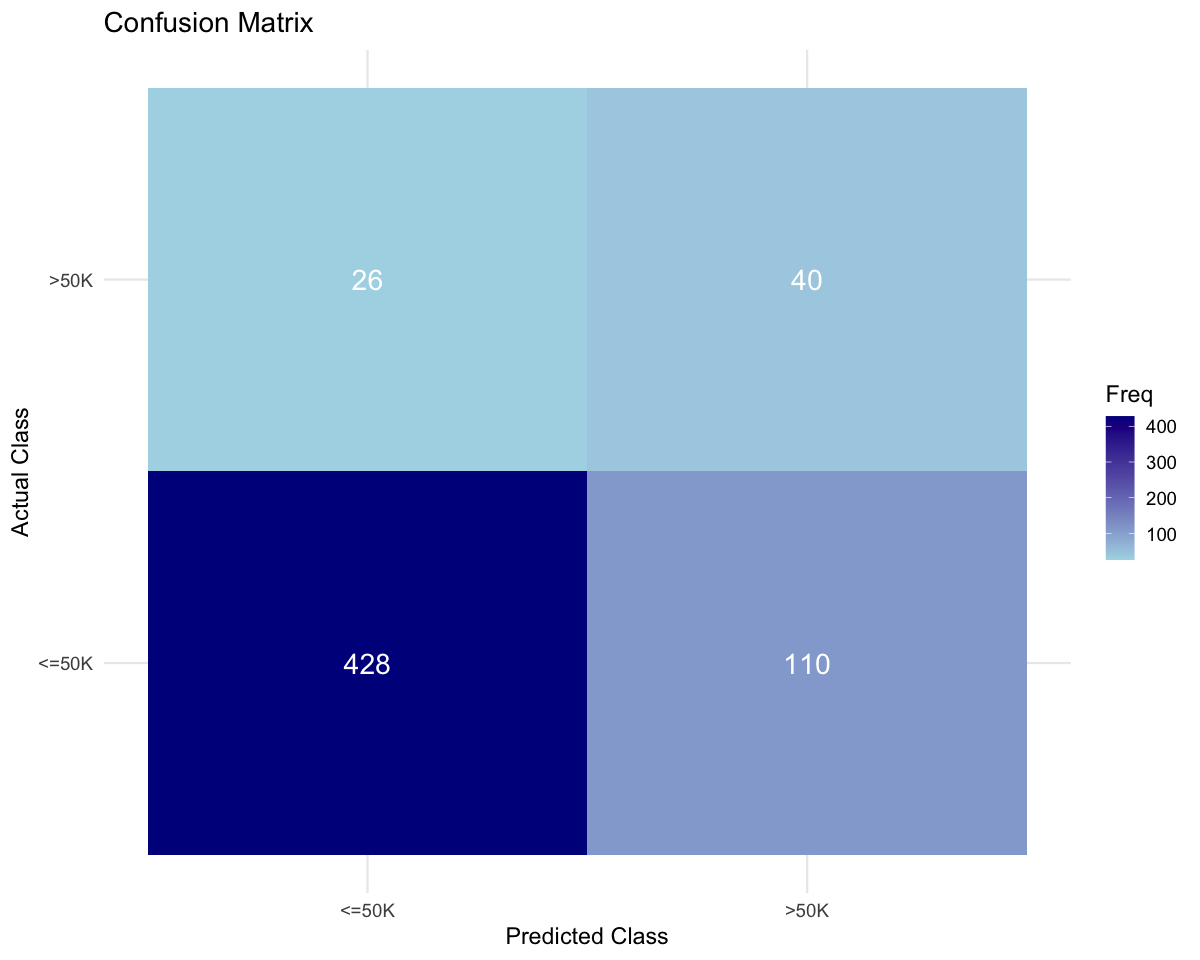

In [11]:
confusion_matrix <- table(Predicted = test_pred_class, Actual = test_data$income)

conf_mat_df <- as.data.frame(confusion_matrix)
colnames(conf_mat_df) <- c("Actual", "Predicted", "Freq")

ggplot(conf_mat_df, aes(x = Predicted, y = Actual, fill = Freq)) +
  geom_tile() +
  geom_text(aes(label = Freq), color = "white", size = 6) +
  scale_fill_gradient(low = "lightblue", high = "darkblue") +
  theme_minimal(base_size = 14) +
  labs(
    title = "Confusion Matrix",
    x = "Predicted Class",
    y = "Actual Class"
  )

#### Figure 3.3: Confusion Matrix of Full Model on Testing Set

### Classification Results and Model Metrics

- **True Positives (TP):** 40 predicted >50K correctly.
- **True Negatives (TN):** 428 predicted <=50K correctly.
- **False Positives (FP):** 110 predicted >50K incorrectly.
- **False Negatives (FN):** 26 predicted <=50K incorrectly.


In [12]:
# Confusion matrix values
TP <- 40  # True Positives
TN <- 428  # True Negatives
FP <- 110  # False Positives
FN <- 26  # False Negatives
n <- TP + TN + FP + FN  # Total observations

# Sensitivity (SN)
sensitivity <- TP / (TP + FN)

# Specificity (SP)
specificity <- TN / (TN + FP)

# Precision (PR)
precision <- TP / (TP + FP)

# Accuracy (ACC)
accuracy <- (TP + TN) / n

# Cohen's Kappa (κ)
observed_accuracy <- (TP + TN) / n
expected_accuracy <- ((TP + FP) / n) * ((TP + FN) / n) + ((TN + FP) / n) * ((TN + FN) / n)
kappa <- (observed_accuracy - expected_accuracy) / (1 - expected_accuracy)

metrics_df <- data.frame(
  Metric = c("Sensitivity", "Specificity", "Precision", "Accuracy", "Cohen's Kappa"),
  Value  = c(sensitivity, specificity, precision, accuracy, kappa)
)

metrics_df

Metric,Value
<chr>,<dbl>
Sensitivity,0.6060606
Specificity,0.7955390
Precision,0.2666667
Accuracy,0.7748344
Cohen's Kappa,0.2577171


#### Table 3.7: Summary of Model Evaluation Metrics

1. **Sensitivity (SN): 0.61** - The model correctly identifies 61% of higher-income individuals.
2. **Specificity (SP): 0.80** - 80% of lower-income individuals are correctly classified.
3. **Precision (PR): 0.27** - 27% of predicted >50K individuals actually earn >50K, indicating many false positives.
4. **Accuracy (ACC): 0.77** - 77% of overall predictions are correct.
5. **Cohen's Kappa (κ): 0.26** - Moderate agreement, better than random chance but room for improvement.

### Interpretation
- Strong specificity, but moderate sensitivity and low precision suggest improvements in identifying high-income individuals.
- High accuracy reflects solid overall performance but overlooks class imbalance.
- Moderate Cohen's Kappa indicates the need for refinement to improve consistency.

## (4) Discussion
#### Summary of Findings and Implications

- The logistic regression model showed strong predictive power (AUC = 0.7965), demonstrating that the model can effectively distinguish income levels better than a baseline.
- These findings can inform policies aimed at reducing income inequality. Education and hours worked were key predictors, emphasizing the need for skill development and work-life balance.
- Understanding the factors behind income disparities can help individuals make more informed career decisions and pursue opportunities for skill enhancement.

#### Expectations and Results

- The model’s AUC (0.7965) is strong, reflecting the importance of predictors like age, education, and hours worked. Overall, the results are consistent with expectations from the research study:
  - **Age** correlates with experience, leading to higher salaries.
  - **Education** increases income, with those holding a degree earning significantly more.
  - **Hours Worked** reflects labor input, where more hours can translate to higher pay.

#### Future Research

- **Geographic Influence on Income:** Including geographic variables may reveal regional disparities in income linked to education and job opportunities.
- **Intersectionality of Demographics:** Exploring how race, gender, and marital status interact could improve the model's accuracy in predicting income.
- **Health and Disability Status:** Accounting for health conditions or disability could provide additional insight into income disparities by limiting education or work opportunities.


## (5) References


1. **Azzollini, L., Breen, R., & Nolan, B. (2023).**  
   *Demographic behaviour and earnings inequality across OECD countries.*  
   Journal of Economic Inequality, 21, 441-461.  
   [https://doi.org/10.1007/s10888-022-09559-1](https://doi.org/10.1007/s10888-022-09559-1)  

2. **Jo, K. (2023).**  
   *Income Prediction Using Machine Learning Techniques.*  
   University of California, Los Angeles.  

3. **Kohavi, R., & Becker, B. (1996).**  
   UCI Machine Learning Repository: Adult Data Set.  
   Retrieved from [https://archive.ics.uci.edu/ml/datasets/adult](https://archive.ics.uci.edu/ml/datasets/adult)  

4. **Smith-Edgell, A. (2024a, September 24).**  
   *Proof point: Financial returns after a post-secondary education have diminished.*  
   RBC Thought Leadership.  
   [https://thoughtleadership.rbc.com/proof-point-financial-returns-after-a-post-secondary-education-have-diminished](https://thoughtleadership.rbc.com/proof-point-financial-returns-after-a-post-secondary-education-have-diminished/#:~:text=Incomes%20are%20positively%20correlated%20with%20higher%20education&text=Respondents%20with%20a%20bachelor’s%20degree,median%20income%20in%20the%20sample.) 